In [1]:
# Set up the path to SModelS installation folder
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/ramos/smodels-develop/')) # or the path to your source code
sys.path.insert(0, module_path)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from smodels.matching.modelTester import getCombiner

In [3]:
slhafile = os.path.expanduser("../data/slhaFiles/slha_files_final/scan_1_y_f1d0dq.slha")
# Define parameters file with combineAnas = ATLAS-SUSY-2019-08,ATLAS-SUSY-2019-09:
parfile = os.path.expanduser('../smodelsPars/parameters_2mdm.ini')

In [4]:
expected = False # whether to plot the observed or expected likelihood
normalize = True # whether to normalize the likelihoods
muvals = np.linspace(-5.,5.,200) # Signal strength values for which to evaluate the likelihoods

In [5]:
combiner = getCombiner(slhafile, parfile)

WARNING in model.setDecays() in 364: Particle zp has a total width/mass = 0.05. Some results may not be valid for broad resonances!
WARNING in model.setDecays() in 364: Particle sd has a total width/mass = 0.04. Some results may not be valid for broad resonances!
WARNING in model.setDecays() in 375: No valid decay found for ghz. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghz~. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghwp. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghwp~. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghwm. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghwm~. It will be considered stable.
WARNING in model.setDecays() in 375: No valid decay found for ghzp. It will be considered stable.
WARNING in model.setDecays() in 375: No valid dec

In [6]:
llhdDict = combiner.getLlhds(muvals,expected,normalize)
llhdDict_exp = combiner.getLlhds(muvals,True,normalize)

In [7]:
muhat = combiner.muhat()
lmax = combiner.lmax()
lsm = combiner.lsm()
lbsm = combiner.likelihood(mu=1.0)
muULDict = {'combined' : combiner.getUpperLimitOnMu()}
for theoryPred in combiner.theoryPredictions:
    anaID = theoryPred.analysisId()
    muULDict[anaID] = theoryPred.getUpperLimitOnMu()

In [8]:
muULDict_exp = {'combined' : combiner.getUpperLimitOnMu(expected=True)}
for theoryPred in combiner.theoryPredictions:
    anaID = theoryPred.analysisId()
    muULDict_exp[anaID] = theoryPred.getUpperLimitOnMu(expected=True)

In [9]:
muULDict_exp

{'combined': 0.4177720426137925,
 'ATLAS-SUSY-2018-22-multibin': 0.5985887585728195,
 'CMS-EXO-20-004': 0.5278942796824567}

In [10]:
muULDict

{'combined': 0.7214364580444768,
 'ATLAS-SUSY-2018-22-multibin': 0.7135017851684317,
 'CMS-EXO-20-004': 1.0250798181993452}

In [11]:
import seaborn as sns
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
cm = plt.cm.get_cmap('RdYlBu')
# plt.rcParams.update({'font.size': 22})


In [28]:
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels


In [29]:
processDict = {'ATLAS-SUSY-2018-22-multibin' : 'ATLAS-SUSY-2018-22'}
def convertLabel(label):
    newlabel = label[:]
    #Replace txnames by process
    for txlabel,proc in processDict.items():
        newlabel = newlabel.replace(txlabel,proc) 
    return newlabel

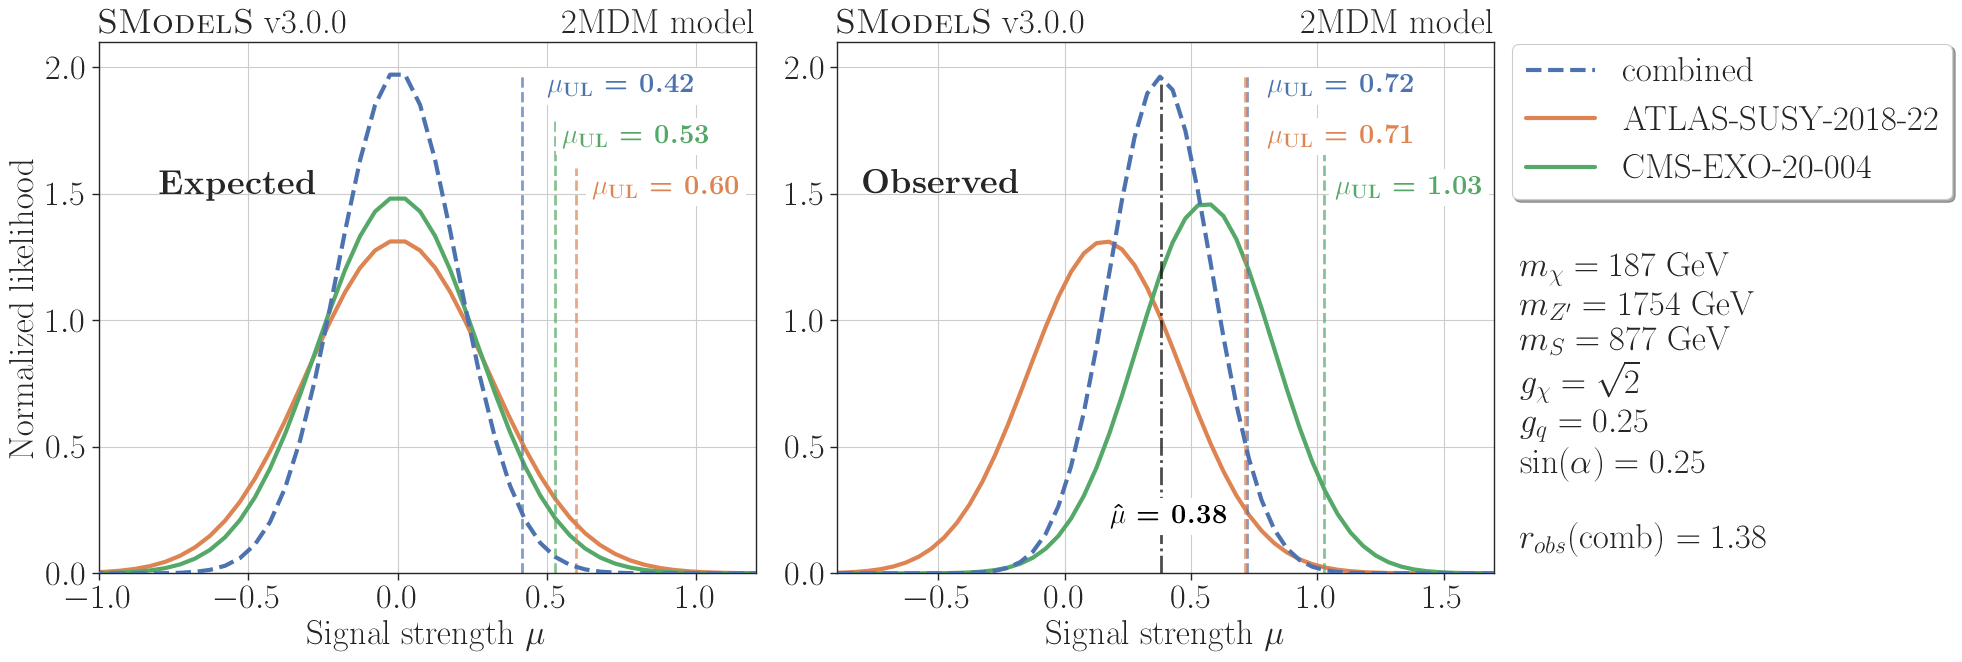

In [39]:
fig, ax = plt.subplots(figsize=(20,7),ncols=2,nrows=1)
colors = {}
ymin = 0.
ymax = 0.
for anaID,l in llhdDict_exp.items():
    if anaID == 'combined':
        zorder = 100
        linestyle = '--'
    else:
        zorder = None
        linestyle = '-'
        
    p = ax[0].plot(muvals,l,label=convertLabel(anaID),linewidth=3,zorder=zorder,linestyle=linestyle)
    colors[anaID] = p[0].get_color()

    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
    
    ax[0].set_title(r'\textsc{SModelS}~v3.0.0', loc='left')
    ax[0].set_title(r'2MDM model', loc='right')
    
ax[0].text(0.5, 1.9, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict_exp['combined']), color=colors['combined'], backgroundcolor='white', fontsize=20)
ax[0].vlines(muULDict_exp['combined'],ymin=ymin, ymax=ymax, linestyle='--',linewidth=2,color=colors['combined'],alpha=0.7)

ax[0].text(0.65, 1.5, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict_exp['ATLAS-SUSY-2018-22-multibin']), color=colors['ATLAS-SUSY-2018-22-multibin'], 
           backgroundcolor='white', fontsize=20)
ax[0].vlines(muULDict_exp['ATLAS-SUSY-2018-22-multibin'],ymin=ymin, ymax=1.6, linestyle='--',linewidth=2,color=colors['ATLAS-SUSY-2018-22-multibin'],alpha=0.7)

ax[0].text(0.55, 1.7, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict_exp['CMS-EXO-20-004']), color=colors['CMS-EXO-20-004'], backgroundcolor='white', fontsize=20)
ax[0].vlines(muULDict_exp['CMS-EXO-20-004'],ymin=ymin, ymax=1.8, linestyle='--',linewidth=2,color=colors['CMS-EXO-20-004'],alpha=0.7)

# ax[0].vlines(muhat,ymin=ymin,ymax=ymax,linestyle='--',black='black',linewidth=2,alpha=0.7)

for anaID,l in llhdDict.items():
    if anaID == 'combined':
        zorder = 100
        linestyle = '--'
    else:
        zorder = None
        linestyle = '-'
        
    p = ax[1].plot(muvals,l,label=convertLabel(anaID),linewidth=3,zorder=zorder,linestyle=linestyle)
    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
    
    ax[1].set_title(r'\textsc{SModelS}~v3.0.0', loc='left')
    ax[1].set_title(r'2MDM model', loc='right')


ax[1].text(0.8, 1.9, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict['combined']), color=colors['combined'], backgroundcolor='white', fontsize=20)
ax[1].vlines(muULDict['combined'],ymin=ymin, ymax=ymax, linestyle='--',linewidth=2,color=colors['combined'],alpha=0.7)

ax[1].text(0.8, 1.7, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict['ATLAS-SUSY-2018-22-multibin']), color=colors['ATLAS-SUSY-2018-22-multibin'], 
           backgroundcolor='white', fontsize=20)
ax[1].vlines(muULDict['ATLAS-SUSY-2018-22-multibin'],ymin=ymin, ymax=ymax, linestyle='--',linewidth=2,color=colors['ATLAS-SUSY-2018-22-multibin'],alpha=0.7)

ax[1].text(1.07, 1.50, r'\textbf{$\mathbf{\mu_{UL}}$ = %1.2f}' %(muULDict['CMS-EXO-20-004']), color=colors['CMS-EXO-20-004'], backgroundcolor='white', fontsize=20)
ax[1].vlines(muULDict['CMS-EXO-20-004'],ymin=ymin, ymax=1.7, linestyle='--',linewidth=2,color=colors['CMS-EXO-20-004'],alpha=0.7)


ax[0].text(-0.8,1.5,r'\textbf{Expected}',fontsize=25)
ax[1].text(-0.8,1.5,r'\textbf{Observed}',fontsize=25)
    
ax[1].text(0.18, 0.2, r'\textbf{$\mathbf{\hat{\mu}}$ = %1.2f}' %(muhat), color='black', backgroundcolor='white', fontsize=20)
ax[1].vlines(muhat,ymin=ymin,ymax=ymax,linestyle='dashdot',linewidth=2,color='black',alpha=0.7)


ax[0].set_xlim(-1.0, 1.2)
ax[1].set_xlim(-0.9, 1.7)

ax[0].set_ylim(0.0, 2.1)
ax[1].set_ylim(0.0, 2.1)

ax[0].set_ylabel('Normalized likelihood')
ax[0].set_xlabel(r'Signal strength $\mu$')
ax[1].set_xlabel(r'Signal strength $\mu$')

plt.text(1.8, 0.1, 
         r'$m_{\chi} = 187$ GeV'+'\n'+r'$m_{Z^{\prime}} = 1754$ GeV'+'\n'+r'$m_{S}=877$ GeV'+'\n'+r'$g_{\chi} = \sqrt{2}$'+'\n'+r'$g_{q}=0.25$'+'\n'+r'$\sin(\alpha) = 0.25$'+'\n\n'+r'$r_{obs}$(comb) $=1.38$',
         fontsize=25)


ax[0].grid()
ax[1].grid()

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.85),
          fancybox=True, shadow=True, fontsize=25)
plt.tight_layout()
plt.savefig('./figures/likelihoods.png')
plt.show()


In [17]:
for anaID in llhdDict.keys():
    print(convertLabel(anaID))

combined
ATLAS-SUSY-2018-22
CMS-EXO-20-004
